In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../../')
import time 

from pyopt.optim import powell, univariante, steepest_descent, fletcher_reeves, bfgs, newton_raphson


### Questão 1

#### Letra (a)


  $$f(x_{1}, x{2})= x_{1}^{2}-3x_{1}x_{2}+4x_{2}^{2}+x_{1}-x_{2}$$

pontos iniciais $x_{0} =\{2,2\}^{t}$ e $x_{0}=\{-1,-3\}^{t}$

In [2]:
from scipy.optimize import minimize

f = lambda x: x[0]**[2]-3*x[0]*x[1]+4*x[1]**2+x[0]-x[1]
initial_point = np.array([2,2])
m = minimize(f, initial_point, method='Powell')
m.x

array([-0.71428573, -0.14285714])

In [3]:
f = lambda x: x[0]**[2]-3*x[0]*x[1]+4*x[1]**2+x[0]-x[1]

initial_point = np.array([2,2])

m = powell(f, initial_point)
m

(array([2.        , 2.00131185]), 16)

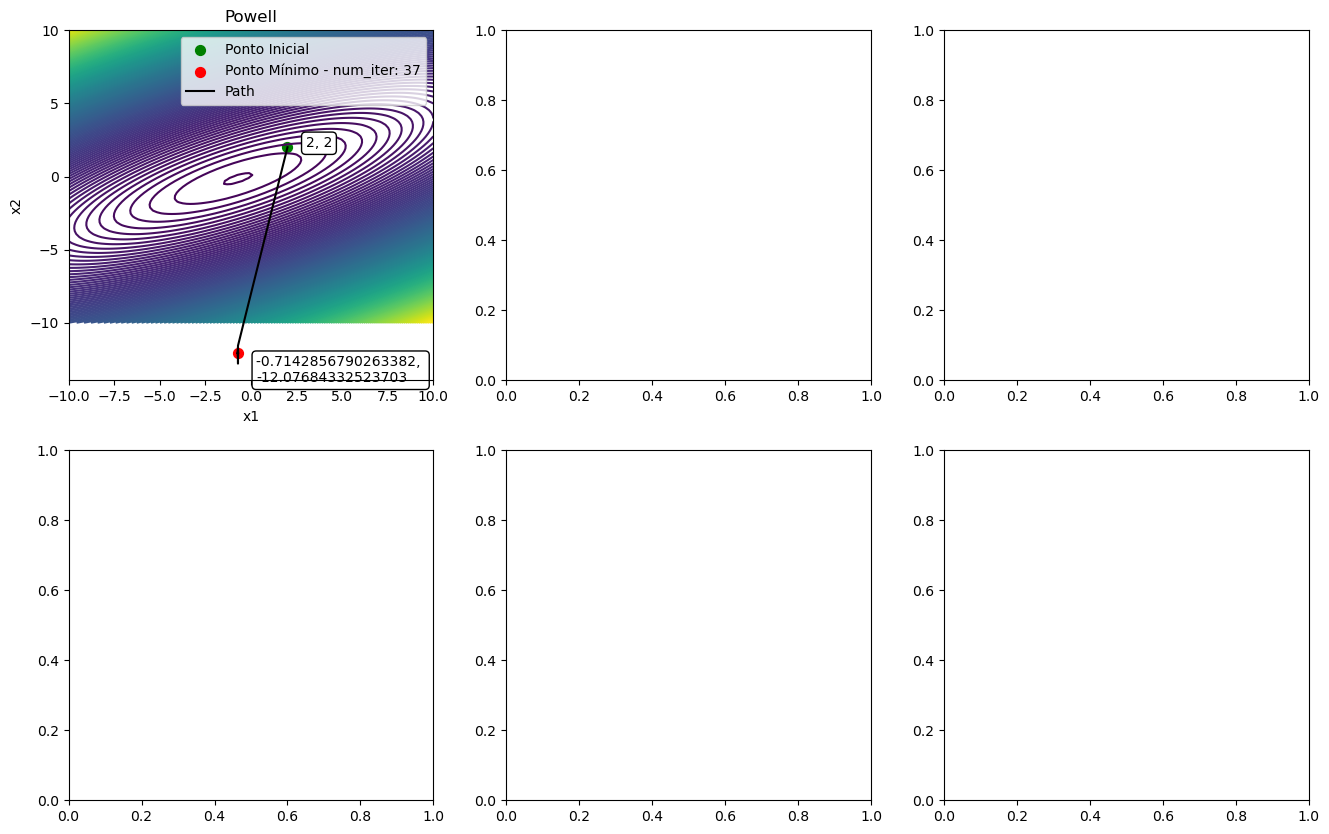

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 10))
contour = ax[0,0].contour(X, Y, Z, 200, cmap='viridis')
method = m
ax[0,0].scatter(initial_point[0], initial_point[1], color='green', s=50, marker='o', label='Ponto Inicial')
ax[0,0].text(initial_point[0] + 1, initial_point[1], f'{initial_point[0]}, {initial_point[1]}', size=10, zorder=2, color='k', bbox=dict(boxstyle="round", alpha=1, facecolor='white'))
ax[0,0].scatter(method["xopt"][0], method["xopt"][1], color='red', s=50, marker='o', label=f'Ponto Mínimo - num_iter: {method["num_iter"]}')
ax[0,0].text(method["xopt"][0] + 1, method["xopt"][1] - 2, f'{method["xopt"][0]}, \n{method["xopt"][1]}', size=10, zorder=2, color='k', bbox=dict(boxstyle="round", alpha=1, facecolor='white'))
path = np.vstack((initial_point, method['path'], method["xopt"]))
ax[0,0].plot(path[:, 0], path[:, 1], color='black', linestyle='-', label='Path')
ax[0,0].set_xlabel('x1')
ax[0,0].set_ylabel('x2')
ax[0,0].set_title('Powell')
ax[0,0].legend(loc='upper right')

#contour = ax[0,1].contour(X, Y, Z, 200, cmap='viridis')
#method = results['BFGS']
#ax[0,1].scatter(initial_point[0], initial_point[1], color='green', s=50, marker='o', label='Ponto Inicial')
#ax[0,1].text(initial_point[0] + 1, initial_point[1], f'{initial_point[0]}, {initial_point[1]}', size=10, zorder=2, color='k', bbox=dict(boxstyle="round", alpha=1, facecolor='white'))
#ax[0,1].scatter(method["xopt"][0], method["xopt"][1], color='red', s=50, marker='o', label=f'Ponto Mínimo - num_iter: {method["nit"]}')
#ax[0,1].text(method["xopt"][0] + 1, method["xopt"][1] - 2, f'{method["xopt"][0]}, \n{method["xopt"][1]}', size=10, zorder=2, color='k', bbox=dict(boxstyle="round", alpha=1, facecolor='white'))
#ax[0,1].set_xlabel('x1')
#ax[0,1].set_ylabel('x2')
#ax[0,1].set_title('BFGS')
#ax[0,1].legend(loc='upper right')

plt.show()




In [6]:

f = lambda x: x[0]**[2]-3*x[0]*x[1]+4*x[1]**2+x[0]-x[1]

x0 = np.array([2,2])

results = {}
for m in [powell]:#, univariante, steepest_descent, fletcher_reeves, bfgs, newton_raphson]:
    start = time.time()
    method = m(f, x0)
    min = method['xopt']
    iter = method['num_iter']
    end = time.time()
    tempo = end - start
    results[m.__name__] = [x0, min, iter, tempo]    

In [8]:
results = pd.DataFrame(results, index=['x0', 'min', 'iter', 'tempo'])
print(results)

                                         powell
x0                                       [2, 2]
min    [-0.7142856787722887, -12.0756591857878]
iter                                         73
tempo                                  0.467316
